In [49]:
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

In [32]:
#inspect and clean data
world = gpd.read_file(".../obesity.geojson")

world.head(10)

#inspect data
world.describe()

,FID,Obesity,SHAPE_Length,SHAPE_Area
count,52.000000,52.000000,52.000000,52.000000
mean,26.500000,29.286538,19.643804,15.959199
std,15.154757,3.832832,9.415594,12.720077
min,1.000000,20.200000,0.000000,0.000000
25%,13.750000,26.250000,16.273290,7.523764
50%,26.500000,29.800000,20.670526,13.832534
75%,39.250000,31.475000,23.525367,22.154717
max,52.000000,36.200000,45.047446,65.778624


In [33]:
#only include continental US / delete other rows
world = world[world.NAME != 'Puerto Rico']

world = world[world.NAME != 'Alaska']

world = world[world.NAME != 'Hawaii']

world

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area,geometry
0,1,Texas,32.4,45.047446,65.778624,"MULTIPOLYGON (((-106.62345 31.91404, -106.6301..."
1,2,California,24.2,40.755927,41.730164,"MULTIPOLYGON (((-118.59398 33.46720, -118.4848..."
2,3,Kentucky,34.6,20.348345,10.665636,"MULTIPOLYGON (((-89.54444 36.57452, -89.47935 ..."
3,4,Georgia,30.7,17.288448,14.682554,"MULTIPOLYGON (((-85.60517 34.98468, -85.47434 ..."
4,5,Wisconsin,30.7,22.428845,16.512937,"MULTIPOLYGON (((-86.93428 45.42116, -86.83575 ..."
5,6,Oregon,30.1,24.565041,28.183016,"MULTIPOLYGON (((-124.55246 42.84057, -124.4809..."
6,7,Virginia,29.2,24.338092,10.776533,"MULTIPOLYGON (((-76.02348 37.28907, -75.98712 ..."
7,8,Tennessee,33.8,20.707562,10.892142,"MULTIPOLYGON (((-90.30070 35.02880, -90.26530 ..."
8,9,Louisiana,36.2,22.176985,11.856408,"MULTIPOLYGON (((-94.04306 32.69304, -94.04303 ..."
9,10,New York,25.0,26.256621,14.073657,"MULTIPOLYGON (((-72.01893 41.27412, -71.92680 ..."


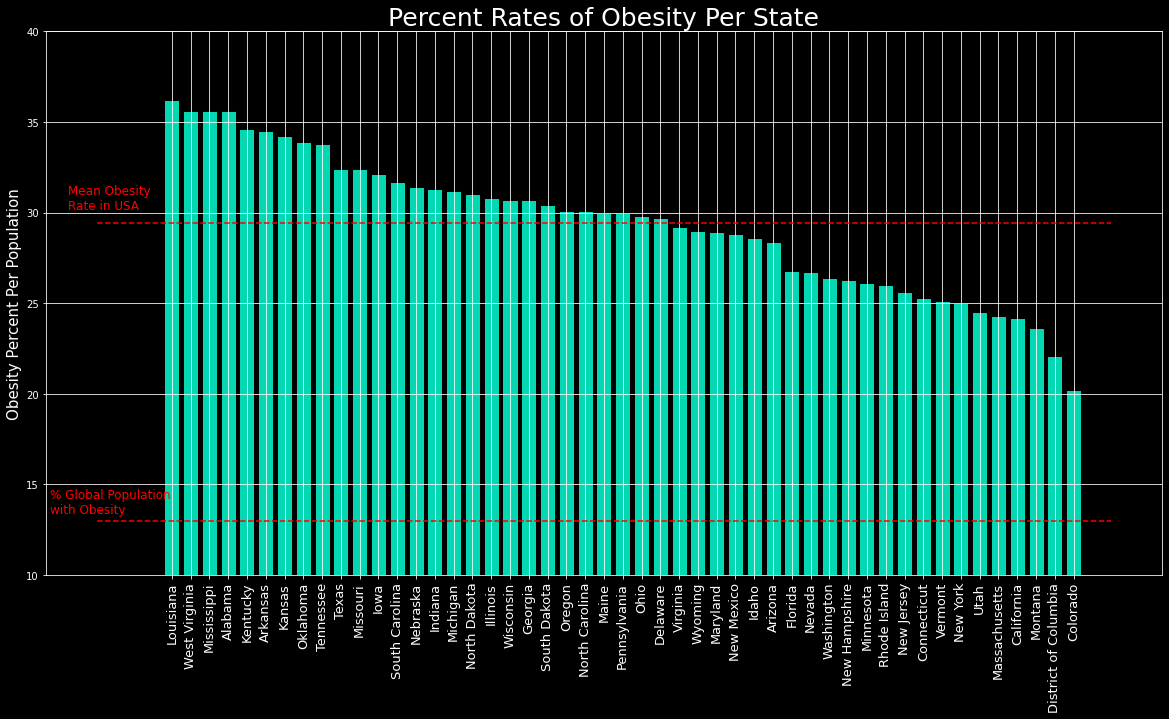

In [34]:
#plot bar chart of relative obesity per state

#create dataframe sorted by obesity rate
sorted = world.sort_values('Obesity', ascending = False)
label=list(sorted.NAME)

plt.figure(figsize=[20,10])
ax = plt.gca()

plt.bar(range(0,len(label)), sorted.Obesity,
           edgecolor='black', color = '#04D8B2')


plt.grid()
plt.title("Percent Rates of Obesity Per State",size=25)
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
ax.set_ylim([10, 40])

plt.ylabel("Obesity Percent Per Population",
    fontdict = {'fontsize': 15})

plt.style.use("dark_background")

plt.hlines(13, -4, 50, linestyles = 'dashed', color = 'red')

plt.text(-6.5, 14, '% Global Population \nwith Obesity', 
    ha='left', 
    va='center', 
    color = 'red', 
    fontdict = {'fontsize': 12})

plt.hlines(world.Obesity.mean(), -4, 50, linestyles = 'dashed', color = 'red')

plt.text(-5.5, 30.2, 'Mean Obesity \nRate in USA', 
    color = 'red', 
    fontdict = {'fontsize': 12})

plt.show()

/Users/evanjarman/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


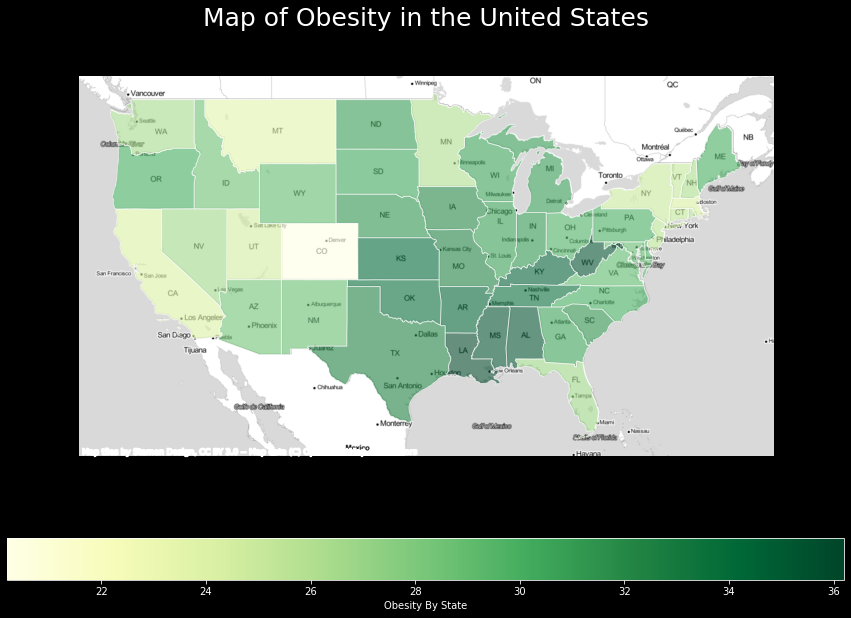

In [58]:
#create choropleth map of obesity in the states

world.crs

df_wm = world.to_crs(epsg=3857)

ax = df_wm.plot(column = 'Obesity',
    legend = 'True',
    legend_kwds={'label': "Obesity By State",
                        'orientation': "horizontal"},
    cmap='YlGn',
    figsize = (15,10),
    edgecolor = 'white',
    alpha=0.6)

ax.set_axis_off()

plt.title('Map of Obesity in the United States', 
    fontdict = {'fontsize': 25,
        'fontweight' : 25,
        'verticalalignment': 'baseline',
        },
    pad = 50)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)